In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./naver_news_scrapy_total_prep.csv', usecols=['media','date','content','content_len'])

df

,media,date,content,content_len
0,연합뉴스,20080401,"금융 새상품 하나, 행장 취임기념 예금 특판서울연합뉴스 황희경 기자 하나은행은 1...",511
1,연합뉴스,20080401,금융 새상품 기업 아이플랜 직장인 신용대출서울연합뉴스 황희경 기자 기업은행0241...,848
2,연합뉴스,20080401,"은행권, 수신 급증..펀드잔액은 급감서울연합뉴스 조재영 기자 올 들어 은행권의 수...",1499
3,연합뉴스,20080401,"전북, 부안 현대저축 예금담보 대출전주연합뉴스 백도인 기자 전북은행006350은 ...",259
4,연합뉴스,20080401,증시 이틀째 폭락상하이연합뉴스 진병태 특파원 중국 증시가 이틀째 폭락하면서 상하이...,540
...,...,...,...,...
305824,이데일리,20221115,"달러 속 위험회피환율, 1320원대 추가 상승 시도외환브리핑이데일리 이윤화 기자 원...",1270
305825,이데일리,20221115,담대 8시대 임박...10월 코픽스 3.98 역대 최고이데일리 전선형 기자 10월 ...,1068
305826,이데일리,20221115,삼모 교수 급격한 긴축에 원화 기치 저평가 심화통화스와프 확대 해야이데일리 이윤화...,1963
305827,이데일리,20221115,마켓인타이틀이 발목밸류 뚝에 골머리 앓는 유니콘이데일리 김연지 기자 지난해 미국에...,1358


In [3]:
# 분석에 사용할 기간에 해당하는 데이터만 불러옴
df=df[(df['date']>= 20110101) & (df['date'] <= 20211231)] 

df

,media,date,content,content_len
35778,연합뉴스,20110101,표 은행 정기예금 금리31일 기준단위 금전신탁 배당률 ...,604
35779,연합뉴스,20110101,국내 주식펀드 수익률 7주째 플러스해외 주식펀드는 한주만에 마이너스 전환 서울연합뉴...,1363
35780,이데일리,20110101,2011경제불확실성 증폭 미중 눈치보기 심해진다이데일리 김춘동 기자 새해 우리나라...,2550
35781,이데일리,20110101,2011경제연구소보다 증권사 전망이 더 좋네이데일리 김춘동 기자 경제 전문가들은 새...,2087
35782,이데일리,20110101,2011 뉴이머징세계 경제 새판 짜기 본격화되나이데일리 김기훈 기자글로벌 금융위기의...,1713
...,...,...,...,...
273861,이데일리,20211231,임인년은 내 집 마련 적기전국 42만가구 물량폭탄이데일리 강신우 기자 가점이 낮아도...,1947
273862,이데일리,20211231,"카오뱅크, 새해도 고신용 신용대출 중단...주담대로 선회이데일리 서대웅 기자 인터넷...",1430
273863,이데일리,20211231,개미의 힘 통했다내년 희망의 해 뜰까이데일리 이지현 기자 신축년 흰 소의 해가 떠오...,1970
273864,이데일리,20211231,해 전세계 시가총액 2경 1400조원 늘어 역대 최대이데일리 방성훈 기자 올해 전 ...,1606


In [4]:
df['date'] = pd.to_datetime(df['date'].astype('str'))

/var/folders/xr/x8smbq7d6l1g33fxnfy1j4b80000gn/T/ipykernel_9437/2721482451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'].astype('str'))


In [5]:
df

,media,date,content,content_len
35778,연합뉴스,2011-01-01,표 은행 정기예금 금리31일 기준단위 금전신탁 배당률 ...,604
35779,연합뉴스,2011-01-01,국내 주식펀드 수익률 7주째 플러스해외 주식펀드는 한주만에 마이너스 전환 서울연합뉴...,1363
35780,이데일리,2011-01-01,2011경제불확실성 증폭 미중 눈치보기 심해진다이데일리 김춘동 기자 새해 우리나라...,2550
35781,이데일리,2011-01-01,2011경제연구소보다 증권사 전망이 더 좋네이데일리 김춘동 기자 경제 전문가들은 새...,2087
35782,이데일리,2011-01-01,2011 뉴이머징세계 경제 새판 짜기 본격화되나이데일리 김기훈 기자글로벌 금융위기의...,1713
...,...,...,...,...
273861,이데일리,2021-12-31,임인년은 내 집 마련 적기전국 42만가구 물량폭탄이데일리 강신우 기자 가점이 낮아도...,1947
273862,이데일리,2021-12-31,"카오뱅크, 새해도 고신용 신용대출 중단...주담대로 선회이데일리 서대웅 기자 인터넷...",1430
273863,이데일리,2021-12-31,개미의 힘 통했다내년 희망의 해 뜰까이데일리 이지현 기자 신축년 흰 소의 해가 떠오...,1970
273864,이데일리,2021-12-31,해 전세계 시가총액 2경 1400조원 늘어 역대 최대이데일리 방성훈 기자 올해 전 ...,1606


In [6]:
EPA = df[df['media'].str.contains('EPA')].index
df.drop(EPA,inplace=True)
df.reset_index(drop=True,inplace=True)

df

/var/folders/xr/x8smbq7d6l1g33fxnfy1j4b80000gn/T/ipykernel_9437/1603843788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(EPA,inplace=True)


,media,date,content,content_len
0,연합뉴스,2011-01-01,표 은행 정기예금 금리31일 기준단위 금전신탁 배당률 ...,604
1,연합뉴스,2011-01-01,국내 주식펀드 수익률 7주째 플러스해외 주식펀드는 한주만에 마이너스 전환 서울연합뉴...,1363
2,이데일리,2011-01-01,2011경제불확실성 증폭 미중 눈치보기 심해진다이데일리 김춘동 기자 새해 우리나라...,2550
3,이데일리,2011-01-01,2011경제연구소보다 증권사 전망이 더 좋네이데일리 김춘동 기자 경제 전문가들은 새...,2087
4,이데일리,2011-01-01,2011 뉴이머징세계 경제 새판 짜기 본격화되나이데일리 김기훈 기자글로벌 금융위기의...,1713
...,...,...,...,...
238078,이데일리,2021-12-31,임인년은 내 집 마련 적기전국 42만가구 물량폭탄이데일리 강신우 기자 가점이 낮아도...,1947
238079,이데일리,2021-12-31,"카오뱅크, 새해도 고신용 신용대출 중단...주담대로 선회이데일리 서대웅 기자 인터넷...",1430
238080,이데일리,2021-12-31,개미의 힘 통했다내년 희망의 해 뜰까이데일리 이지현 기자 신축년 흰 소의 해가 떠오...,1970
238081,이데일리,2021-12-31,해 전세계 시가총액 2경 1400조원 늘어 역대 최대이데일리 방성훈 기자 올해 전 ...,1606


In [7]:
df.to_csv('naver_news_prep.csv', index=False)

----------

# 시각화

In [8]:
df=pd.read_csv('./naver_news_prep.csv')

df

,media,date,content,content_len
0,연합뉴스,2011-01-01,표 은행 정기예금 금리31일 기준단위 금전신탁 배당률 ...,604
1,연합뉴스,2011-01-01,국내 주식펀드 수익률 7주째 플러스해외 주식펀드는 한주만에 마이너스 전환 서울연합뉴...,1363
2,이데일리,2011-01-01,2011경제불확실성 증폭 미중 눈치보기 심해진다이데일리 김춘동 기자 새해 우리나라...,2550
3,이데일리,2011-01-01,2011경제연구소보다 증권사 전망이 더 좋네이데일리 김춘동 기자 경제 전문가들은 새...,2087
4,이데일리,2011-01-01,2011 뉴이머징세계 경제 새판 짜기 본격화되나이데일리 김기훈 기자글로벌 금융위기의...,1713
...,...,...,...,...
238078,이데일리,2021-12-31,임인년은 내 집 마련 적기전국 42만가구 물량폭탄이데일리 강신우 기자 가점이 낮아도...,1947
238079,이데일리,2021-12-31,"카오뱅크, 새해도 고신용 신용대출 중단...주담대로 선회이데일리 서대웅 기자 인터넷...",1430
238080,이데일리,2021-12-31,개미의 힘 통했다내년 희망의 해 뜰까이데일리 이지현 기자 신축년 흰 소의 해가 떠오...,1970
238081,이데일리,2021-12-31,해 전세계 시가총액 2경 1400조원 늘어 역대 최대이데일리 방성훈 기자 올해 전 ...,1606


In [11]:
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238083 entries, 0 to 238082
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   media        238083 non-null  object        
 1   date         238083 non-null  datetime64[ns]
 2   content      238083 non-null  object        
 3   content_len  238083 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.3+ MB


In [12]:
df['year']=df.date.dt.year

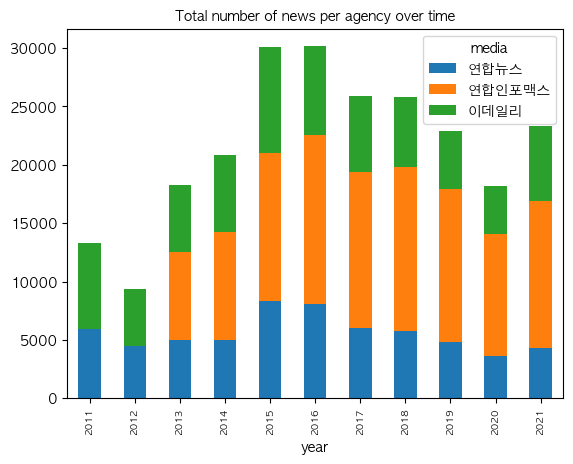

<Figure size 2500x2200 with 0 Axes>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')

labels=['연합뉴스','연합인포맥스','이데일리']
plt.rcParams['axes.unicode_minus'] = False

label = df['year'].unique()
index=np.arange(len(label))
legend=df['media'].unique()
alpha = 0.5

sum_by_media_year = df.groupby(['year','media'])['content'].count().unstack('media')
sum_by_media_year.plot(kind='bar', stacked=True)

plt.title('Total number of news per agency over time', fontsize=10)
plt.xticks(index, fontsize=7, rotation=90)
plt.figure(figsize=(25,22))
plt.show()

-----

In [ ]:
from ekonlpy.sentiment import MPCK

df=pd.read_csv('./naver_news_prep.csv')

mpck = MPCK()
ngram_list=[]

for i in df['content']:
    tokens = mpck.tokenize(i)
    ngrams = mpck.ngramize(tokens)
    ngram_list.append(ngrams)
    score = mpck.classify(tokens + ngrams, intensity_cutoff=1.5)
print(ngram_list)

In [ ]:
import re
import os
from ekonlpy.topic import MPCK

def news_ngram():
    '''
    의사록 5-gram 함수
    return: n-gram 개수
    '''
    ngram_list = []

    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    text = []
    
    mpck = MPCK()
    tokens = mpck.tokenize(df['content'])
    ngrams = mpck.ngramize(tokens)
    ngram_list.append(ngrams)
    score = mpck.classify(tokens + ngrams, intensity_cutoff=1.5)

    # ngram_list = list(itertools.chain(*ngram_list))
    # ngram_list = list(set(ngram_list))
    return len(ngram_list)

news_ngram(df[])

0    금융 새상품 하나, 행장 취임기념 예금 특판서울연합뉴스 황희경 기자  하나은행은 1...
1    금융 새상품 기업 아이플랜 직장인 신용대출서울연합뉴스 황희경 기자  기업은행0241...
2    은행권, 수신 급증..펀드잔액은 급감서울연합뉴스 조재영 기자  올 들어 은행권의 수...
3    전북, 부안 현대저축 예금담보 대출전주연합뉴스 백도인 기자  전북은행006350은 ...
4    증시 이틀째 폭락상하이연합뉴스 진병태 특파원  중국 증시가 이틀째 폭락하면서 상하이...
Name: content, dtype: object